# WeRateDogs Twitter Data Wrangling and Analysis Project
DECI L3 FINAL PROJECT 👨🏻‍🎓

Made by Mohamed Elsayed Zaky 😁

## Prepration 🍰

In [900]:
# Main Libraires
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
# to read tsv file after downlading it using requests
import io

## 1️⃣ Gathering Data 🕵🏻‍♂️

1. Reading `twitter-archive-enhanced.csv` file

In [901]:
tae = pd.read_csv("twitter-archive-enhanced.csv")

2. Reading the `image_predictions.tsv` file

In [902]:
# the url of the image_predictions.tsv file
image_predictions_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# import it in pandas
image_predictions = requests.get(image_predictions_url)

# Using IO library convert the tsv file to file like object to be able to read
content = image_predictions.content.decode('utf-8')
file_like_object = io.StringIO(content)

In [903]:
nlp = pd.read_csv(file_like_object, sep="\t")

3. Setup Twitter API for addtional data

Note:
- **<div style="color: #e91e63">Because Twitter API Free Plan doesn't offer get_status so I am forced to use the "tweets_json.txt" file in the classroom</div>**

In [904]:
# Gather Three colums `tweet_id`, `retweet_count`, `favorite_count`
tweet_id = []
retweet_count = []
favorite_count = []

# Read twets_json.txt
with open("tweets_json.txt", "r") as file:
  for line in file:
    # Read line as dict
    data = json.loads(line)
    # append data to the list
    tweet_id.append(data['id'])
    retweet_count.append(data['retweet_count'])
    favorite_count.append(data['favorite_count'])
    
tweets_data = {
  "Tweet id": tweet_id,
  "Retweet count": retweet_count,
  "Favorite count": favorite_count,
}

twitter_df = pd.DataFrame(tweets_data)

## 2️⃣ Assessing 👨🏻‍💻

**<h3 style="border-left: 5px solid #673ab7; padding: 0 20px">First: Twitter Archived Enhanced 🚀<h3>**

Let's see the head of the dataset 🕵🏻‍♀️

In [905]:
tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


Hmmm! `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`  seems to be the majority is null let's check that!

In [906]:
tae['in_reply_to_status_id'].isna().value_counts()

in_reply_to_status_id
True     2278
False      78
Name: count, dtype: int64

In [907]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

There are about 181 retweet let's check that

In [908]:
tae[~tae["retweeted_status_id"].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,NaN,NaN,NaN
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,NaN,NaN,NaN,NaN
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,NaN,NaN,NaN,NaN
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,NaN,NaN,NaN,NaN,NaN
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,NaN,NaN,NaN,NaN,NaN


Let's also check the repalyed tweets

In [909]:
tae[~tae["in_reply_to_status_id"].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,NaN,NaN,NaN,NaN,NaN
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,NaN,NaN,NaN,NaN,NaN
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,NaN,NaN,NaN,NaN
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN


There are also 78 rows or entry is a replay

I observed that `expanded_urls` are non except for row number `2169` so let's check that

In [910]:
tae["expanded_urls"][2169]

'https://twitter.com/dog_rates/status/669353438988365824/photo/1'

After check it. It's a replay in a thread method. The @dog_rates account makes two tweets for the same dog in a thread.

So let's check threads

In [911]:
replay_tae = tae[~tae["in_reply_to_status_id"].isna()]
replay_tae["name"].isna().value_counts()

name
True     77
False     1
Name: count, dtype: int64

In [912]:
replay_tae[replay_tae["name"].isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,NaN,NaN,NaN,NaN


So if we checked the name it by the name only. As there are some links not working. We will find that `2169` is the only replay we need.

Let's see the `name` column

In [913]:
def print_max_rows(func):
  pd.set_option("display.max_rows", None) # to display max rows
  print(func)
  pd.reset_option("display.max_rows", None) # reset settings

In [914]:
print_max_rows(tae["name"].value_counts())

name
a                 55
Charlie           12
Oliver            11
Cooper            11
Lucy              11
Lola              10
Tucker            10
Penny             10
Bo                 9
Winston            9
the                8
Sadie              8
Daisy              7
Buddy              7
Bailey             7
Toby               7
an                 7
Bella              6
Jack               6
Oscar              6
Rusty              6
Stanley            6
Scout              6
Jax                6
Leo                6
Milo               6
Koda               6
Dave               6
Oakley             5
Larry              5
Sunny              5
Louis              5
Chester            5
George             5
Alfie              5
Finn               5
very               5
Sammy              5
Gus                5
Phil               5
Bentley            5
Sampson            4
Reginald           4
quite              4
Boomer             4
Reggie             4
Loki               4
Dexter  

In [915]:
tae["name"].isna().value_counts()[True]

745

I observed that there are wrong names and all wrong names starts with small letters like: `a`, `the`, `very`, `quite`, `just` and `an`.

So let's check names starts with small and capital letters. And also the NaNs.

In [916]:
tae["name"].fillna(value="nan", inplace=True)
tae["name"].str.istitle().value_counts()

name
True     1496
False     860
Name: count, dtype: int64

Notes:
  - There are about 745 null values.
  - There are also incorret names like `a`, `the`, `very`, `quite`, `just` and `an`.
  - There are 115 rows it's names is not correct.

Also I am wandring what's inside the `text` so let's take a random entry

In [917]:
tae["text"][1500]

"This is Edgar. He's a Sassafras Puggleflash. Nothing satisfies him. Not since the war. 10/10 cheer up pup https://t.co/1NgMb9BTWB"

No need to the last link, it gives me the link of the tweet

**<h3 style="border-left: 5px solid #673ab7; padding: 0 20px">Secound: Image Predection Dataset 🔮<h3>**

In [918]:
nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [919]:
nlp.head() # 315

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [920]:
nlp[["p1_dog"	,"p2_dog"	,"p3_dog"]].value_counts()

p1_dog  p2_dog  p3_dog
True    True    True      1243
False   False   False      324
True    True    False      155
False   True    True       101
True    False   True        91
False   False   True        64
        True    False       54
True    False   False       43
Name: count, dtype: int64

Notes:
- There are about 1243 entry or 60% of dataset are predicted to be true by the the models. (Most Likely to be images of dogs) 😉
- There are totally 411 entry are true by two models. (Almost is images of dogs) 🙂
- There are 161 entry are true by one model only. (May be an image of dog) 😕
- 324 entry are totally false (low percentage to be an image of dog) 😟

Let's check that visiually 🕵🏻‍♀️

In [921]:
nlp[~(nlp["p1_dog"] + nlp["p2_dog"] + nlp["p3_dog"])] # Three are false

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


After seeing random images `21`, `6`, ...
- The majority is not dogs
- Some are dogs but with very low quality or it's an image of dog or it's not clear.

In [922]:
nlp[((nlp["p1_dog"] + 0) + (nlp["p2_dog"] + 0) + (nlp["p3_dog"] + 0)) == 2].head() # True by two

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False


In [923]:
nlp[((nlp["p1_dog"] + 0) + (nlp["p2_dog"] + 0) + (nlp["p3_dog"] + 0)) == 1].head() # True by one

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
82,667491009379606528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False


After checking random samples 100% of images is for dogs even if only one model predict it to be a dog 🤓

**<h3 style="border-left: 5px solid #673ab7; padding: 0 20px">Third: Twitter Json 👨🏻‍💻<h3>**

In [924]:
twitter_df.head()

,Tweet id,Retweet count,Favorite count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


There is not anything to clean 😉

**<h3 style="border-left: 5px solid #673ab7; padding: 0 20px">Issues in a nutsell 🤓🤓<h3>**

**Quality Issues 🥇**
- `timestamp` column is string rather than datetime object
- `source` column has the html anchor tage `<a>` with the link. It must be the link only.
- No need to `source` column as it's the same repeated value. No need to visit the settings page.
- There are five colums have more than 70% of it null values.
- `expanded_urls` is just this 'https://twitter.com/dog_rates/status/' with the id of the tweet. no need to it as we have the id.
- `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` Tells us that there are about 181 entries is just a retweet. we do not need them.
- `name` has about 745 null values
- `name` 115 rows it's names is not correct
- There are about 78 row is an replays
- Some images in Image Predection Dataset are not for dogs.

**Tidness Issues 🧹**:
- The `doggo`, `floofer`, `pupper`, and `puppo` columns are just terms that refers to the dogs 
characteristics. It must be one colum called `dog characteristics`
- `timestamp` must have the date only no need to the time.

## 3️⃣ Cleaning 🧼

**<h3 style="border-left: 5px solid #673ab7; padding: 0 20px">First: Twitter Archived Enhanced 🚀<h3>**

First let's make a copy of tae dataframe 📁

In [925]:
cleaned_tae = tae.copy()

In [926]:
pd.options.mode.chained_assignment = None # to prevent warnings

Let's drop any replays except column `2169`

In [927]:
cleaned_tae['in_reply_to_status_id'][2169] = np.nan # Set the column 2169 to be nan

cleaned_tae = cleaned_tae[cleaned_tae["in_reply_to_status_id"].isna()]

Let's drop the columns that we doesn't need it.

In [928]:
cleaned_tae.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'expanded_urls'], inplace=True)

Also let's drop any retweet entry

In [929]:
cleaned_tae = cleaned_tae[cleaned_tae['retweeted_status_id'].isna()]

Then no need to `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns

In [930]:
cleaned_tae.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

Convert time stamp to datetime and trim the time

In [931]:
cleaned_tae["timestamp"] = pd.to_datetime(cleaned_tae["timestamp"].str.slice(0, 10))

let's clean text column from the last link

In [932]:
cleaned_tae["text"] = cleaned_tae["text"].str[:-24]

Let's clean the `name` column

In [933]:
cleaned_tae[~cleaned_tae["name"].str.istitle()]["name"].value_counts() # Check names starts with small letters

name
nan             603
a                55
the               8
an                6
one               4
very              4
quite             3
just              3
CeCe              2
actually          2
getting           2
not               2
his               1
my                1
JD                1
space             1
light             1
life              1
officially        1
by                1
incredibly        1
infuriating       1
old               1
all               1
unacceptable      1
this              1
mad               1
such              1
BeBe              1
DonDon            1
DayZ              1
Name: count, dtype: int64

In [934]:
cleaned_tae[cleaned_tae["name"] == "CeCe"]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1412,698953797952008193,2016-02-14,Meet CeCe. She wanted to take a selfie before ...,11,10,CeCe,NaN,NaN,NaN,NaN
1715,680221482581123072,2015-12-25,This is CeCe. She's patiently waiting for Sant...,10,10,CeCe,NaN,NaN,NaN,NaN


We can't use .istitle method as there are 5 rows contain real dog names but it isn't a title format.

So let's make our function that tells us if the first letter is `lowercase` or `uppercase` and returns `NaN` if it's `lowercase`. 😉

In [935]:
def replace_lowercase_names(name):
    if name[0].islower():
        return np.nan
    return name

cleaned_tae["name"] = cleaned_tae["name"].apply(replace_lowercase_names)

Let's make the `doggo`, `floofer`, `pupper`, and `puppo` in one column called `characteristic` using melt method

In [936]:
cleaned_tae = pd.melt(cleaned_tae, id_vars=["tweet_id", "timestamp", "text", "rating_numerator", "rating_denominator", "name"], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name="value", value_name='characteristic')

Drop any duplicates due to NaN values

In [962]:
cleaned_tae.drop_duplicates(inplace=True)

In [939]:
cleaned_tae.drop(columns="value", inplace=True) # drop value column resulted from pd.melt()

Finally we now have a cleaned version of Twitter Archived Enhanced 😆

In [940]:
cleaned_tae.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,characteristic
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


**<h3 style="border-left: 5px solid #673ab7; padding: 0 20px">Secound: Image Predection Dataset 🔮<h3>**

In [941]:
nlp_cleaned = nlp.copy()

In [942]:
nlp_cleaned = nlp[(nlp["p1_dog"] + nlp["p2_dog"] + nlp["p3_dog"])]

## 4️⃣ Storing data 🧠

Storing The master dataset `cleaned_tae` to `twitter_archive_master.csv` 🧠

In [943]:
cleaned_tae.to_csv("twitter_archive_master.csv")

## 5️⃣ Analyzing, and visualizing data 📊

#### Let's find the heighest rating dog 🥇

In [944]:
(cleaned_tae["rating_numerator"] / cleaned_tae["rating_denominator"]).sort_values(ascending=False).head(1)

770    177.6
dtype: float64

In [945]:
cleaned_tae.loc[770]

tweet_id                                             749981277374128128
timestamp                                           2016-07-04 00:00:00
text                  This is Atticus. He's quite simply America af....
rating_numerator                                                   1776
rating_denominator                                                   10
name                                                            Atticus
characteristic                                                      NaN
Name: 770, dtype: object

In [946]:
heighest_rated = cleaned_tae["tweet_id"][770]
print(f"https://twitter.com/dog_rates/status/{heighest_rated}")

https://twitter.com/dog_rates/status/749981277374128128


#### Let's find the top 5 names repeated

<Axes: title={'center': 'Top 5 dog popular names'}, ylabel='Name Popularity %'>

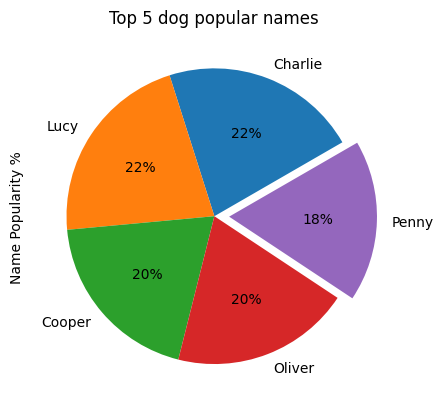

In [947]:
cleaned_tae["name"].value_counts().head(5).plot(kind="pie", title="Top 5 dog popular names", ylabel="Name Popularity %", autopct='%1.0f%%', explode=(0, 0, 0,0,  0.1), startangle=30)

- `Lucy` and `Charlie` have the lions share with 22% for each one.
- `Cooper` and `Oliver` are 20% for each one.
- `Penny` is the least of them with 18% only.

#### Favorite count vs Retweet Count ❤ 🔁

In [948]:
retweet_total = twitter_df['Retweet count'].sum()

In [949]:
favorite_total = twitter_df['Favorite count'].sum()

In [950]:
total_fav_ret = favorite_total + retweet_total

In [951]:
retweet_per = (retweet_total / total_fav_ret) * 100

In [952]:
favorite_per = (favorite_total / total_fav_ret) * 100

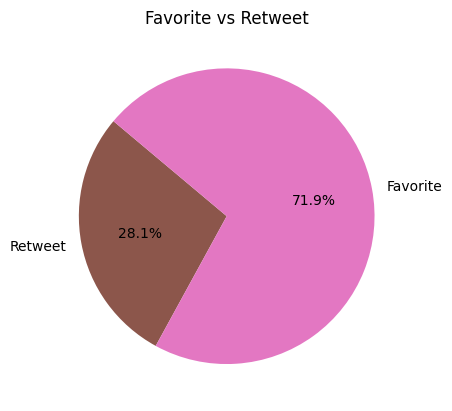

In [953]:
plt.pie([retweet_per, favorite_per], labels=["Retweet", "Favorite"], colors=['#8c564b', '#e377c2'], autopct='%1.1f%%', startangle=140)
plt.title('Favorite vs Retweet')
plt.show()

#### let's see the heighest favorite and retweeted

In [954]:
# twitter_df["Retweet count"].sort_values(ascending=False) to Get the heighest favorite

heighest_favorite = twitter_df.loc[412][0]

print(f"https://twitter.com/dog_rates/status/{heighest_favorite}")

https://twitter.com/dog_rates/status/822872901745569793


In [955]:
# twitter_df["Retweet count"].sort_values(ascending=False) to Get the heighest retweeted

heighest_retweeted = twitter_df.loc[1037][0]

print(f"https://twitter.com/dog_rates/status/{heighest_retweeted}")

https://twitter.com/dog_rates/status/744234799360020481


Let's see the data range

In [956]:
min_date = str(cleaned_tae['timestamp'].min())[0:4]
max_date = str(cleaned_tae['timestamp'].max())[0:4]

print(f"The data is ranged between {min_date} to {max_date}")

The data is ranged between 2015 to 2017


Let's see the data size

In [957]:
data_range = len(cleaned_tae["tweet_id"].unique())

print(f"The data size is: {data_range}")

The data size is: 2098


#### Also let's see the distribution of characteristic

<Axes: title={'center': 'Top 5 dog popular names'}, ylabel='Name Popularity %'>

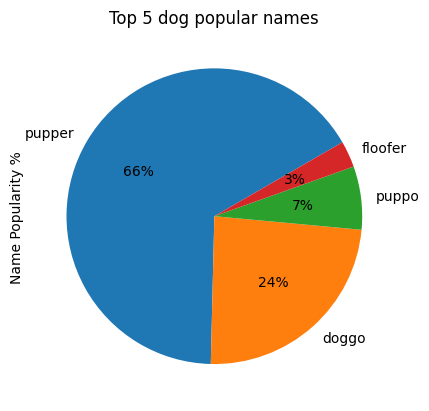

In [979]:
cleaned_tae["characteristic"].value_counts().plot(kind="pie", title="Top 5 dog popular names", ylabel="Name Popularity %", autopct='%1.0f%%', explode=(0, 0, 0,  0), startangle=30)

- `Pupper` is the heighest with 66%
- `Doggo` is in the secound place with 24%
- `Floofer` and `Puppo` are about 10% only